In [1]:
from misc import load_pkl

pretrained_fn = 'network-final.pkl'
G, D, _ = load_pkl(pretrained_fn)
G_smoothing = 0.999
Gs = G.create_temporally_smoothed_version(beta=G_smoothing, explicit_updates=True)

In [2]:
import theano
from theano import tensor as T

num_labels = 2

fake_latents_var = T.TensorType('float32', [False] * len(G.input_shape))            ('fake_latents_var')
# fake_labels_var  = T.TensorType('float32', [False] * len(training_set.labels.shape))('fake_labels_var')
fake_labels_var  = T.TensorType('float32', [False] * num_labels)('fake_labels_var')
gen_fn = theano.function([fake_latents_var, fake_labels_var], Gs.eval_nd(fake_latents_var, fake_labels_var, ignore_unused_inputs=True), on_unused_input='ignore')


In [28]:
import numpy as np

def random_latents(num_latents, G_input_shape):
    return np.random.randn(num_latents, *G_input_shape[1:]).astype(np.float32)

N = 1  # note: gen_fn returns NX3X1024X1024 image stack
snapshot_fake_latents = random_latents(N, G.input_shape)
snapshot_fake_labels = np.ones((N, 1), dtype=np.float32)

# snapshot_fake_latents = np.zeros_like(snapshot_fake_latents)
# snapshot_fake_latents[0] = -1

print(snapshot_fake_latents.shape, snapshot_fake_labels.shape)


((1, 512), (1, 1))


In [29]:
snapshot_fake_images = gen_fn(snapshot_fake_latents, snapshot_fake_labels)


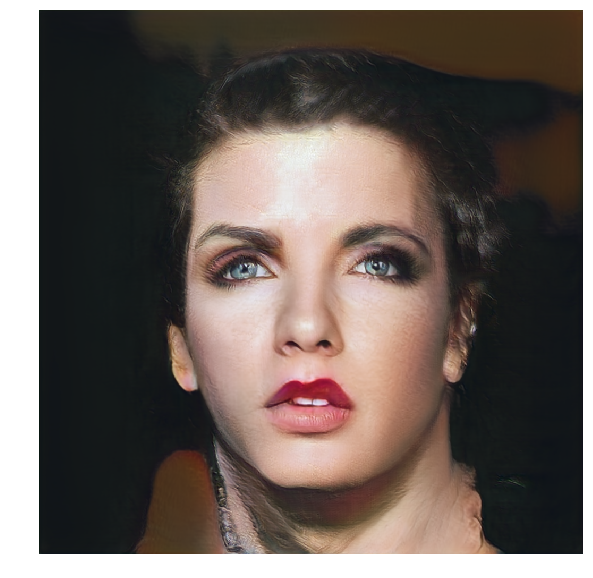

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

for im in snapshot_fake_images:
    im = im.squeeze().transpose((1,2,0))
    im -= im.min()
    im /= im.max()

    plt.figure(figsize=(10,10))
    plt.imshow(im)
    plt.axis('off')

In [27]:
import os

name = 'were-face'

im_fn = '../' + name + '.png'
if os.path.exists(im_fn):
    print('give it a new name')
else:
    plt.imsave(im_fn, im)

vec_fn = '../'+name+'_vec.npy'
if os.path.exists(vec_fn):
    print('give it a new name')
else:
    np.save(vec_fn, snapshot_fake_latents)